# Preliminary Data Analysis with Sample Data

In [48]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

As a part of the preliminary data analysis, will be working on 30% of the data.

1. Within the 10% of the data, will be splitting the data into train and test.

2. Will be validating the models with the sample before working on the full datasets.

3. Precision of the models are validated through the recall_precision_curve.


In [51]:
#Reading the clean file
masterData = pd.read_csv('Backorder.csv')

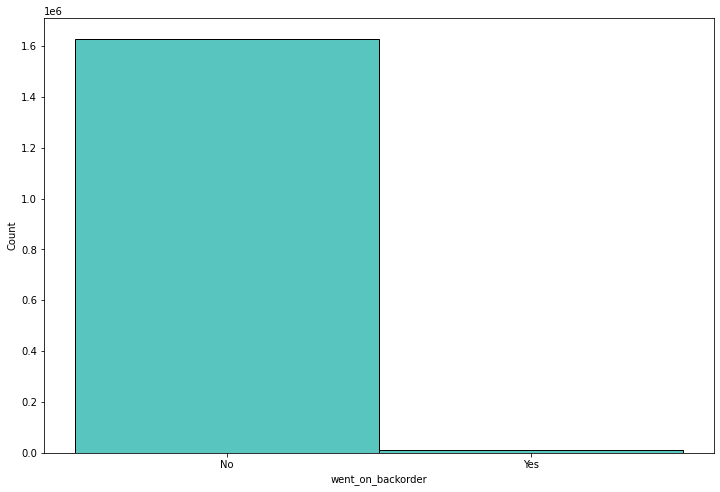

In [52]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=masterData,x='went_on_backorder',color='lightseagreen')
ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

In [53]:
masterData['went_on_backorder'].value_counts()

No     1628546
Yes      11188
Name: went_on_backorder, dtype: int64

In [54]:
join1=masterData[masterData['went_on_backorder']=='Yes']
join2=masterData[masterData['went_on_backorder']=='No']
join3=join2.sample(n=11000, random_state = 2)

masterData=pd.merge(join1,join3,how='outer')
masterData=masterData.sample(frac=1).reset_index(drop=True)
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2231849,0.0,2.0,0.0,4.0,12.0,23.0,2.0,No,0.00,0.00,No,No,No,Yes,No,Yes
1,1884556,13.0,8.0,7.0,16.0,26.0,35.0,2.0,No,0.67,0.39,No,No,No,Yes,No,Yes
2,1827395,0.0,2.0,0.0,0.0,0.0,0.0,0.0,No,0.00,0.00,Yes,No,Yes,Yes,No,Yes
3,3275515,3.0,8.0,3.0,8.0,15.0,23.0,4.0,No,0.83,0.85,No,No,No,Yes,No,No
4,1988945,0.0,2.0,0.0,0.0,1.0,1.0,0.0,No,0.83,0.86,Yes,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22183,2297462,0.0,12.0,0.0,2.0,4.0,10.0,0.0,No,0.73,0.76,No,No,No,Yes,No,Yes
22184,1830221,0.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.98,0.98,Yes,No,Yes,Yes,No,Yes
22185,2088975,0.0,9.0,2.0,3.0,6.0,7.0,0.0,No,0.70,0.66,No,No,No,Yes,No,Yes
22186,1129829,16.0,9.0,0.0,7.0,7.0,8.0,0.0,No,0.69,0.68,No,No,Yes,Yes,No,No


In [55]:
#Preparing the data for modeling
#X = pd.DataFrame(masterData.columns)
X = masterData[masterData.columns]
y = masterData['went_on_backorder']
X.shape, y.shape

((22188, 17), (22188,))

In [56]:
#Convert the categorical data into numerical
y = y.replace('Yes', 1)
y = y.replace('No', 0)
X['source_has_issue'] = X.source_has_issue.map({'Yes':1, 'No':0})
X['deck_risk'] = X.deck_risk.map({'Yes':1, 'No':0})
X['oe_constraint'] = X.oe_constraint.map({'Yes':1, 'No':0})
X['ppap_risk'] = X.ppap_risk.map({'Yes':1, 'No':0})
X['stop_auto_buy'] = X.stop_auto_buy.map({'Yes':1, 'No':0})
X['rev_stop'] = X.rev_stop.map({'Yes':1, 'No':0})
X = X.drop(['went_on_backorder', 'source_has_issue', 'rev_stop', 'deck_risk', 'ppap_risk', 'stop_auto_buy','product_id'], axis = 1, errors = 'ignore')
X.shape, y.shape

((22188, 10), (22188,))

In [57]:
#get the 10% of the data
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((16641, 10), (16641,), (5547, 10), (5547,))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11648, 10), (4993, 10), (11648,), (4993,))

# Training the KNN Model Classifier

In [59]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]
#Create the pipeline: pipeline
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
#print the report
print(knn_report)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      2484
           1       0.72      0.77      0.75      2509

    accuracy                           0.74      4993
   macro avg       0.74      0.73      0.73      4993
weighted avg       0.74      0.74      0.73      4993



# Training the SVC Model Classifier

In [60]:
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_svc = Pipeline(steps)

# Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict( X_test )
# get the classification report
svc_report = classification_report( y_test, svc_prediction )
#print the report
print(svc_report)

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      2484
           1       0.63      0.51      0.57      2509

    accuracy                           0.61      4993
   macro avg       0.61      0.61      0.60      4993
weighted avg       0.61      0.61      0.60      4993



# Training the LogisticRegression Model 

In [61]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report( y_test, logreg_prediction )
#print the report
print(logreg_report)

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      2484
           1       0.62      0.58      0.60      2509

    accuracy                           0.61      4993
   macro avg       0.61      0.61      0.61      4993
weighted avg       0.61      0.61      0.61      4993



# Training the RandomForest Classifier

In [62]:
#Train default RandomForest on 30% of the data
rfmodel = RandomForestClassifier(random_state = 42)
#Fit the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report =  classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2484
           1       0.87      0.92      0.89      2509

    accuracy                           0.89      4993
   macro avg       0.89      0.89      0.89      4993
weighted avg       0.89      0.89      0.89      4993



# Training GradientBoosting Classifier model

In [63]:
#Train default RandomForest on 30% of the data
gbmodel = GradientBoostingClassifier(random_state = 42)
#Fit the training set
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict(X_test)
#get the classification report
gbmodel_report =  classification_report(y_test, gbmodel_prediction)
#print the report
print(gbmodel_report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2484
           1       0.85      0.88      0.87      2509

    accuracy                           0.87      4993
   macro avg       0.87      0.87      0.87      4993
weighted avg       0.87      0.87      0.87      4993



# Training AdaBoostClassifier Model

In [64]:
#Train default RandomForest on 30% of the data
abmodel = AdaBoostClassifier(random_state = 42)
#Fit the training set
abmodel.fit(X_train, y_train)
abmodel_prediction = abmodel.predict(X_test)
#get the classification report
abmodel_report =  classification_report(y_test, abmodel_prediction)
#print the report
print(abmodel_report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2484
           1       0.83      0.87      0.85      2509

    accuracy                           0.85      4993
   macro avg       0.85      0.85      0.85      4993
weighted avg       0.85      0.85      0.85      4993



# Training the AdaBoostClassifier with RandomForest Estimator

In [65]:
#Train default RandomForest on 30% of the data
abmodel_rf = AdaBoostClassifier(base_estimator = rfmodel, random_state = 42)
#Fit the training set
abmodel_rf.fit(X_train, y_train)
abmodel_prediction_rf = abmodel_rf.predict(X_test)
#get the classification report
abmodel_report_rf =  classification_report(y_test, abmodel_prediction_rf)
#print the report
print(abmodel_report_rf)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2484
           1       0.87      0.92      0.90      2509

    accuracy                           0.89      4993
   macro avg       0.90      0.89      0.89      4993
weighted avg       0.90      0.89      0.89      4993



In [43]:
feature_import_rf = pd.Series(rfmodel.feature_importances_, index = X_test.columns)
feature_import_rf.sort_values(ascending = False)


current_inventory               0.409697
prior_sales_6_month             0.091196
source_performance_6_months     0.086669
source_performance_12_months    0.086269
prior_sales_3_month             0.084116
prior_sales_1_month             0.073360
prior_sales_9_month             0.072090
minimum_recommend_stock         0.049787
transit_duration                0.046733
oe_constraint                   0.000082
dtype: float64

In [44]:
feature_import_gb = pd.Series(gbmodel.feature_importances_, index = X_test.columns)
feature_import_gb.sort_values(ascending = False)


current_inventory               0.628698
prior_sales_1_month             0.125767
prior_sales_3_month             0.087195
prior_sales_6_month             0.061263
prior_sales_9_month             0.038240
transit_duration                0.026493
source_performance_6_months     0.015331
source_performance_12_months    0.009316
minimum_recommend_stock         0.007697
oe_constraint                   0.000000
dtype: float64

# Traning the AdaBoostClassifier with GradientBoosting Estimator

In [45]:
#Train default AdaBoost model with the GB estimator
abmodel_gb = AdaBoostClassifier(base_estimator = gbmodel, random_state = 42)
#Fit the training model
abmodel_gb.fit(X_train, y_train)
abmodel_prediction_gb = abmodel_gb.predict(X_test)
#get the classication report
abmodel_report_gb = classification_report(y_test, abmodel_prediction_gb)
#print the report
print(abmodel_report_gb)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2472
           1       0.86      0.90      0.88      2521

    accuracy                           0.88      4993
   macro avg       0.88      0.88      0.88      4993
weighted avg       0.88      0.88      0.88      4993



Text(0.5, 1.0, 'ROC Curve')

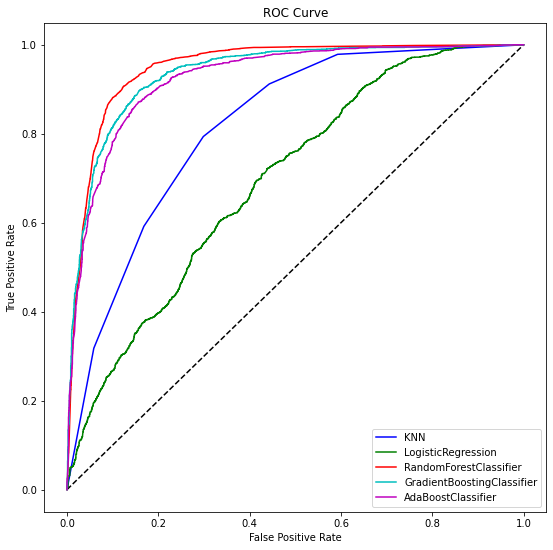

In [46]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Recall Precision Curve')

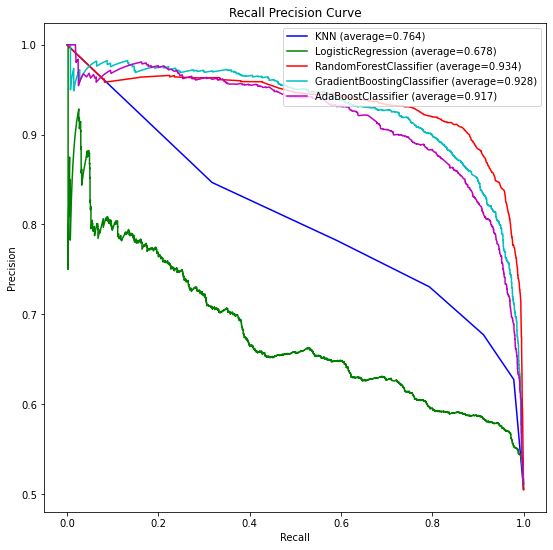

In [47]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')